### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
df = pd.read_csv('data/coupons.csv')
df.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5720,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
724,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,41,Single,...,never,4~8,1~3,less1,1,1,0,0,1,0
7698,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Male,50plus,Married partner,...,less1,less1,1~3,1~3,1,1,0,1,0,1
110,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
2916,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,31,Divorced,...,less1,1~3,less1,4~8,1,0,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

In [6]:
missing_vals = df.isnull().sum()
missing_vals

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
ans = df['car'].unique() 
ans1 = df['Bar'].unique()
ans2 = df['CoffeeHouse'].unique()
ans3 = df['CarryAway'].unique()
ans4 = df['RestaurantLessThan20'].unique()
ans5 = df['Restaurant20To50'].unique()
print(ans, ans1, ans2, ans3, ans4, ans5)

[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D'] ['never' 'less1' '1~3' 'gt8' nan '4~8'] ['never' 'less1' '4~8' '1~3' 'gt8' nan] [nan '4~8' '1~3' 'gt8' 'less1' 'never'] ['4~8' '1~3' 'less1' 'gt8' nan 'never'] ['1~3' 'less1' 'never' 'gt8' '4~8' nan]


In [8]:
# the car data seems irrelevant. All the other columns are important to keep
#data missing are not number or that could be converted. The code below is not applicable
#df['Bar'] = df['Bar'].fillna(df['Bar'].mean())
#the data missing are a small percentage and can be dropped from the data
df = df.dropna(subset= ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
missing_vals1 = df.isnull().sum()
missing_vals1

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     11971
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [9]:
accept_coupon = df['Y'].value_counts(normalize = True)
accept_coupon

1    0.569335
0    0.430665
Name: Y, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:title={'center':'Coupons accepted'}, xlabel='coupon', ylabel='Y'>

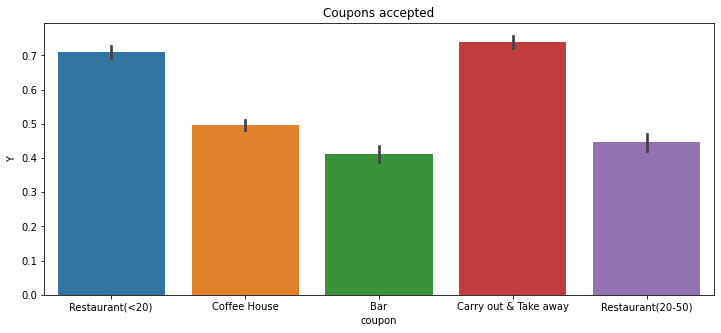

In [10]:
plt.figure(figsize = (12,5))
plt.title("Coupons accepted")
sns.barplot(data=df, x='coupon', y='Y')

<AxesSubplot:title={'center':'Percentage of Coupons accepted'}, ylabel='coupon'>

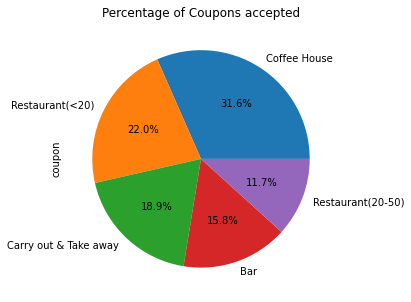

In [11]:
plt.figure(figsize = (12,5))
plt.title("Percentage of Coupons accepted")
df['coupon'].value_counts().plot(kind='pie', autopct='%1.1f%%')

6. Use a histogram to visualize the temperature column.

<AxesSubplot:title={'center':'Temperature when Coupons were distributed/accepted'}, xlabel='temperature', ylabel='Count'>

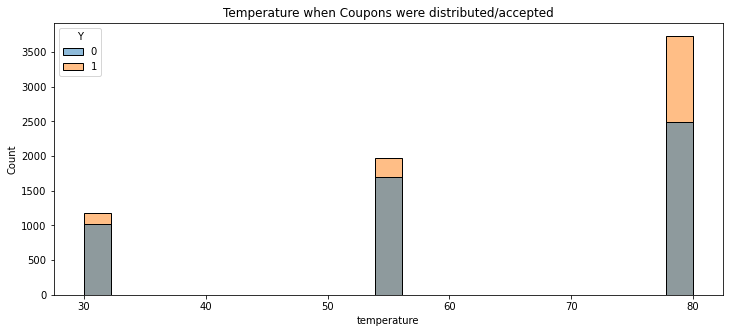

In [12]:
plt.figure(figsize = (12,5))
plt.title("Temperature when Coupons were distributed/accepted")
sns.histplot( data = df, x = 'temperature', hue = 'Y')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
bar = df[df['coupon'].isin(['Bar'])]
bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [14]:
accept_bar = bar['Y'].value_counts(normalize = True)
accept_bar

0    0.588082
1    0.411918
Name: Y, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
round(pd.crosstab(bar['Bar'],bar['Y'],normalize=True)*100,2)

Y,0,1
Bar,,
1~3,7.00,12.81
4~8,1.73,5.96
gt8,0.68,1.73
less1,16.00,12.91
never,33.40,7.79


<AxesSubplot:title={'center':'Accepted coupons between bar-goers'}, xlabel='Bar', ylabel='Y'>

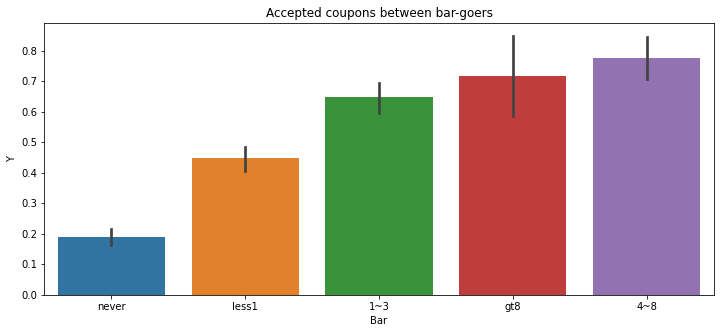

In [16]:
plt.figure(figsize = (12,5))
plt.title("Accepted coupons between bar-goers")
sns.barplot(data=bar, x='Bar', y='Y')
#people that goes to a bar 3 or fewer times acceptance rate was lower

<AxesSubplot:title={'center':'Acceptance between bar-goers'}, xlabel='Bar', ylabel='Count'>

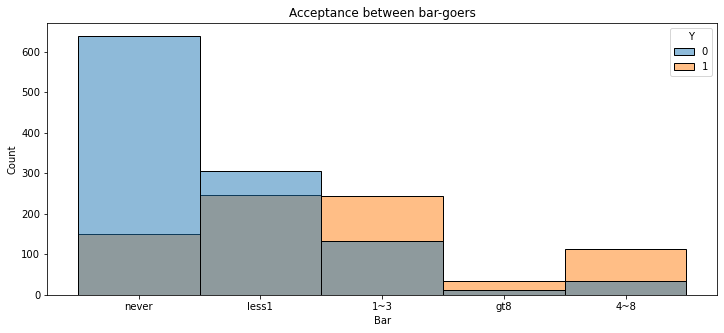

In [17]:
plt.figure(figsize = (12,5))
plt.title("Acceptance between bar-goers")
sns.histplot( data = bar, x = 'Bar', hue = 'Y')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bar visitors acceptance rate')

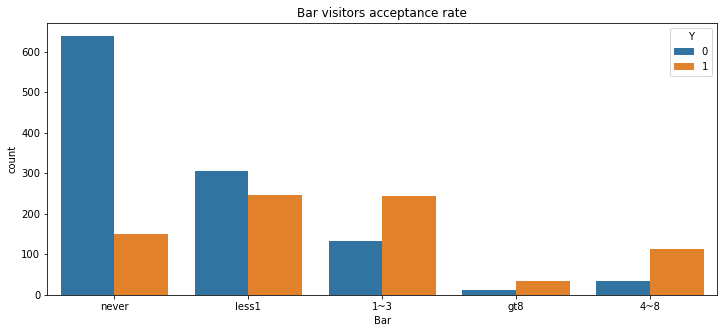

In [18]:
plt.figure(figsize = (12,5))
sns.countplot("Bar", data = bar, hue = 'Y')
plt.title("Bar visitors acceptance rate")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [19]:
ans6 = df['age'].unique()
ans6

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [20]:
df["age"] = df["age"].str.replace("50plus", '55').str.replace("below21", '19')

In [21]:
ans7 = df["age"].unique()
ans7

array(['21', '46', '26', '31', '41', '55', '36', '19'], dtype=object)

In [23]:
df["age"] = pd.to_numeric(df["age"])

In [24]:
df.describe()

,temperature,age,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12079.000000,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,33.072191,0.408478,1.0,0.561222,0.119381,0.215167,0.784833,0.569335
std,19.133246,11.578658,0.491573,0.0,0.496258,0.324249,0.410955,0.410955,0.495190
min,30.000000,19.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,31.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,41.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,55.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
missing_vals2 = df.isnull().sum()
missing_vals2

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     11971
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [26]:
bar = df[df['coupon'].isin(['Bar'])]
bar1 = bar[bar['Y'].isin([1])]
bar1

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
79,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Single,...,never,1~3,1~3,less1,1,1,0,0,1,1
12573,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Single,...,never,1~3,1~3,less1,1,1,0,0,1,1
12591,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,55,Divorced,...,less1,1~3,1~3,less1,1,1,0,0,1,1
12644,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,1


In [27]:
round(pd.crosstab(bar1['age'], bar1['Bar'],normalize=True)*100,2)

Bar,1~3,4~8,gt8,less1,never
age,,,,,
19,0.25,0.00,0.25,0.76,3.05
21,8.50,4.19,1.27,7.74,3.68
26,7.99,5.58,1.90,4.44,2.79
31,5.58,1.78,0.38,4.70,3.05
36,1.78,0.76,0.00,3.05,2.03
41,2.28,0.38,0.00,5.84,1.02
46,0.76,0.76,0.00,2.03,1.27
55,3.93,1.02,0.38,2.79,2.03


Drivers who go to a bar more than once a month and are over the age of 25 and accepted represents 35.26% and all others that accepted was 64.74%. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age of the people bargoers that accepted coupon')

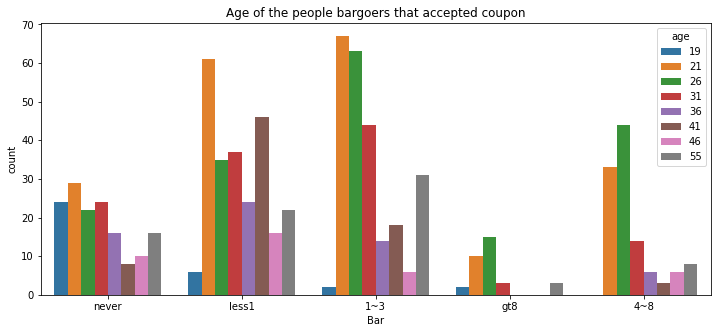

In [28]:
plt.figure(figsize = (12,5))
sns.countplot("Bar", data = bar1, hue = 'age')
plt.title("Age of the people bargoers that accepted coupon")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bar visitors age acceptance rate')

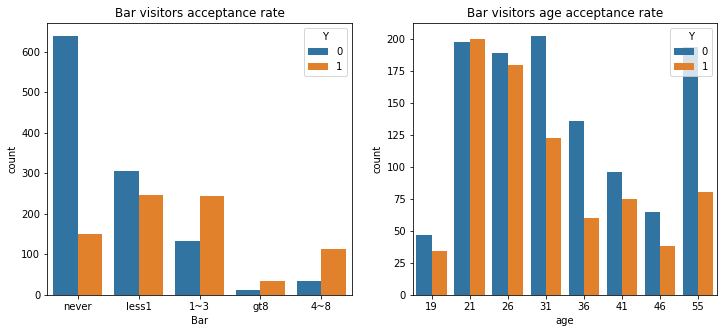

In [29]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.countplot("Bar", data = bar, hue = 'Y')
plt.title("Bar visitors acceptance rate")

plt.subplot(122)
sns.countplot("age", data = bar, hue = 'Y')
plt.title("Bar visitors age acceptance rate")

In [30]:
total_accept_bar = bar['Y'].value_counts()
total_accept_bar

0    1125
1     788
Name: Y, dtype: int64

In [31]:
#lowbar= bar[bar['Bar'].isin(['never' and 'less1' and '1~3'])]
bar['Bar'].value_counts()

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

In [33]:
barnever = df[df['Bar'].isin(['never'])]

Text(0.5, 1.0, 'Acceptance rate bar coupous of people that never go to bar - by age')

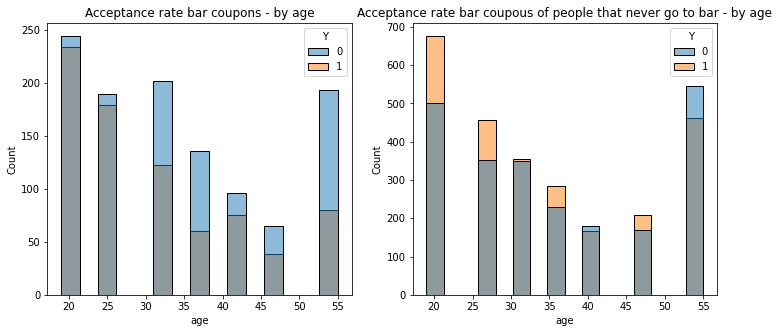

In [34]:
plt.figure(figsize = (12,5))
plt.subplot(121)
sns.histplot(bar, x='age', hue = 'Y')
plt.title("Acceptance rate bar coupons - by age")

plt.subplot(122)
sns.histplot(barnever, x = 'age', hue = 'Y')
plt.title("Acceptance rate bar coupous of people that never go to bar - by age")

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

In [35]:
bar1 = barnever.query("Y == 1")
bar2 = bar1['age'].value_counts(normalize = True)
bar2

55    0.177079
26    0.175163
21    0.169414
31    0.135684
36    0.109237
19    0.089690
46    0.080107
41    0.063626
Name: age, dtype: float64

In [37]:
d2 = df['age'].value_counts()
d3 = bar2/d2
d3

19    0.000178
21    0.000067
26    0.000073
31    0.000070
36    0.000087
41    0.000060
46    0.000121
55    0.000102
Name: age, dtype: float64



Usually the people that accepted the bar coupon they are frequent goers to bars.
People that never go to bars were influenced and accepted the coupons, most strongly with people with people that never goes to bars under the age of 25 years old.



7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [38]:
ans = df['occupation'].unique()
ans

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [39]:
occ = bar.loc[(bar['occupation']=='Farming Fishing & Forestry')]
occ

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8431,No Urgent Place,Kid(s),Rainy,55,10PM,Bar,1d,Male,41,Married partner,...,never,never,1~3,never,1,1,0,0,1,0
8432,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Male,41,Married partner,...,never,never,1~3,never,1,1,0,0,1,0
8438,No Urgent Place,Friend(s),Rainy,55,10PM,Bar,2h,Male,41,Married partner,...,never,never,1~3,never,1,1,0,0,1,0
8445,Home,Alone,Sunny,80,6PM,Bar,2h,Male,41,Married partner,...,never,never,1~3,never,1,0,0,1,0,0
9558,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Male,31,Married partner,...,less1,less1,1~3,less1,1,0,0,0,1,1
9565,Home,Kid(s),Sunny,30,6PM,Bar,2h,Male,31,Married partner,...,less1,less1,1~3,less1,1,1,0,0,1,1
9568,Home,Alone,Rainy,55,6PM,Bar,1d,Male,31,Married partner,...,less1,less1,1~3,less1,1,1,1,0,1,1
9571,Work,Alone,Sunny,30,7AM,Bar,1d,Male,31,Married partner,...,less1,less1,1~3,less1,1,1,0,1,0,0
9574,Work,Alone,Rainy,55,7AM,Bar,1d,Male,31,Married partner,...,less1,less1,1~3,less1,1,1,1,0,1,1


In [ ]:
px.scatter(bar.query('year == 2007'), x = 'gdpPercap', y = 'lifeExp', color = 'country', size = 'pop', log_x = True)

In [ ]:
round(pd.crosstab(bar1['age'], bar1['Bar'],normalize=True)*100,2)

8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [106]:
data[data["temperature"] > 55]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12672,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


In [ ]:
User attributes
Gender: male, female
Age: below 21, 21 to 25, 26 to 30, etc.
Marital Status: single, married partner, unmarried partner, or widowed
Number of children: 0, 1, or more than 1
Education: high school, bachelors degree, associates degree, or graduate degree
Occupation: architecture & engineering, business & financial, etc.
Annual income: less than $12500, $12500 - $24999, $25000 - $37499, etc.
Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
Number of times that he/she eats at a restaurant with average expense less than $20 per person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
Contextual attributes
Driving destination: home, work, or no urgent destination
Location of user, coupon and destination: we provide a map to show the geographical location of the user, destination, and the venue, and we mark the distance between each two places with time of driving. The user can see whether the venue is in the same direction as the destination.
Weather: sunny, rainy, or snowy
Temperature: 30F, 55F, or 80F
Time: 10AM, 2PM, or 6PM
Passenger: alone, partner, kid(s), or friend(s)
Coupon attributes
time before it expires: 2 hours or one day